# Shallow Network Regions
This notebook aims to help get a better understanding of shallow network regions by defining two formulas to calculate the number of regions in a shallow neural network, using the formulas to compute the number of regions for some shallow neural network with different dimensions of inputs ann hidden units, and plotting the graph to see the changes in the number of regions in respect to another variable

## Definition of Shallow Network Region 
A **shallow network region** is an area of the neural network where all the activation functions are constant or act linearly.

### Imports 
Import functions needed to define and plot the formulas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

## Zaslavsky's Formula 
Zaslavsky's Formula is a formula that takes the dimensions of input (Di) and the number of hidden units (D) as its input and outputs the number of regions of the neural network based on a summation formula.

### Define Zaslavsky's Formula

In [2]:
def number_regions(Di, D):
  N = 0
  for j in range(0, Di + 1):
    N += (math.comb(D, j))

  return N

### Compute the Number of Regions 
Compute the number of regions of a particular shallow neural network by inputting the dimensions of the input and the number of hidden units to Zaslavsky's Formula.

In [3]:
# Calculate the number of regions for 2D input (Di=2) and 3 hidden units (D=3)
N = number_regions(2, 3)
print(f"Di=2, D=3, Number of regions = {int(N)}, True value = 7")

# Calculate the number of regions for 10D input (Di=10) and 50 hidden units (D=50)
N = number_regions(10, 50)
print(f"Di=10, D=50, Number of regions = {int(N)}, True value = 13432735556")

Di=2, D=3, Number of regions = 7, True value = 7
Di=10, D=50, Number of regions = 13432735556, True value = 13432735556


### Plot the Graph 
Plot the graph of the effect of the number of hidden units to the number of regions for a shallow neural network with 1-D, 5-D, 10-D, 50-D, and 100-D input values.

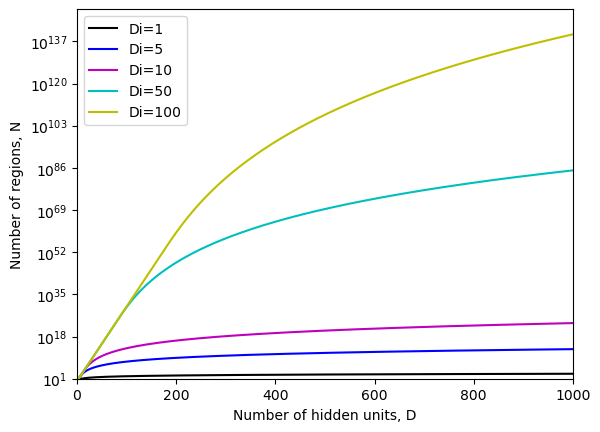

In [8]:
dims = np.array([1,5,10,50,100])
regions = np.zeros((dims.shape[0], 1000))
for c_dim in range(dims.shape[0]):
    D_i = dims[c_dim]
    for D in range(1000):
        regions[c_dim, D] = number_regions(np.min([D_i,D]), D)

fig, ax = plt.subplots()
ax.semilogy(regions[0,:],'k-')
ax.semilogy(regions[1,:],'b-')
ax.semilogy(regions[2,:],'m-')
ax.semilogy(regions[3,:],'c-')
ax.semilogy(regions[4,:],'y-')
ax.legend(['Di=1', 'Di=5', 'Di=10', 'Di=50', 'Di=100'])
ax.set_xlabel("Number of hidden units, D")
ax.set_ylabel("Number of regions, N")
plt.xlim([0,1000])
plt.ylim([1e1,1e150])
plt.show()

## Computing Shallow Network Regions Using Parameters 
Use an alternative method to compute the number of regions using the number of parameters, which is a function of the number of hidden units and the input dimension

### Define Number of Parameters Function 
Define a function that takes the number of hidden units (D) and the input dimension (Di) as the inputs and outputs the number of parameters for that neural network. Assume that the neural network only has one output.

In [5]:
def number_parameters(D_i, D):
  N = D*(D_i + 1) + D + 1

  return N 

### Compute the Number of Parameters 
Compute the number of parameters for a particular neural network with 1 output, 10-D input dimensions, and 8 hidden units.

In [6]:
N = number_parameters(10, 8)
print(f"Di=10, D=8, Number of parameters = {int(N)}, True value = 97")

Di=10, D=8, Number of parameters = 97, True value = 97


### Plot the Graph 
Plot the graph to visualize the change in the number of network regions as a result of the change in the number of parameters for shallow neural networks with 1-D, 5-D, 10-D, 50-D, and 100-D input values

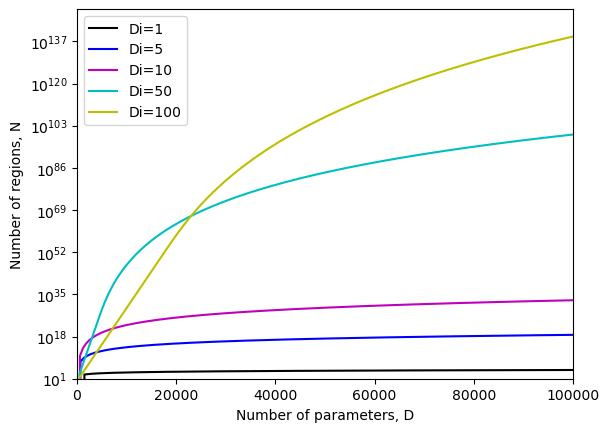

In [9]:
dims = np.array([1,5,10,50,100])
regions = np.zeros((dims.shape[0], 200))
params = np.zeros((dims.shape[0], 200))

for c_dim in range(dims.shape[0]):
    D_i = dims[c_dim]
    for c_hidden in range(1, 200):
        # Iterate over different ranges of number hidden variables for different input sizes
        D = int(c_hidden * 500 / D_i)
        params[c_dim, c_hidden] =  D_i * D +D + D +1
        regions[c_dim, c_hidden] = number_regions(np.min([D_i,D]), D)

fig, ax = plt.subplots()
ax.semilogy(params[0,:], regions[0,:],'k-')
ax.semilogy(params[1,:], regions[1,:],'b-')
ax.semilogy(params[2,:], regions[2,:],'m-')
ax.semilogy(params[3,:], regions[3,:],'c-')
ax.semilogy(params[4,:], regions[4,:],'y-')
ax.legend(['Di=1', 'Di=5', 'Di=10', 'Di=50', 'Di=100'])
ax.set_xlabel("Number of parameters, D")
ax.set_ylabel("Number of regions, N")
plt.xlim([0,100000])
plt.ylim([1e1,1e150])
plt.show()